In [1]:
!pip install keras-facenet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 27.7 MB/s eta 0:00:00
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10385 sha256=8a0065e15b1ba60b3bb65154133878cf62b7c2ee4acf115246c79cbeb9be9cc3
  Stored in directory: /root/.cache/pip/wheels/73/5d/41/90b5d28ca667cfc4748ae859fa4f0b85b936d73207a073ded5
Successfully built keras-facenet


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras_facenet import FaceNet

In [4]:
# Load images from labeled folders
def load_images(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img = tf.keras.preprocessing.image.load_img(os.path.join(folder_path, filename), target_size=(224,224))
        img = tf.keras.preprocessing.image.img_to_array(img)
        images.append(img)
    return np.array(images)

#Make dataset and labels from URLs
def make_dataset_labels(urls):
    folders = []
    lbls = []

    i=0
    for url in urls:
      folder = load_images(url)
      folders.append(folder)

      if i==0:
        lbls.append(np.zeros(len(folders[i])))
      else:
        lbls.append(np.ones(len(folders[i]))*i)
      i+=1

    images = np.concatenate(folders, axis=0)

    labels = np.concatenate(lbls, axis=0)
    labels = tf.keras.utils.to_categorical(labels)

    return images,labels

#urls = [
#    '/content/drive/MyDrive/sample/dinesh',
#    '/content/drive/MyDrive/sample/ganesh',
#    '/content/drive/MyDrive/sample/gowtham',
#    '/content/drive/MyDrive/sample/narendran',
#    '/content/drive/MyDrive/sample/naveen',
#    '/content/drive/MyDrive/sample/pradheep',
#    '/content/drive/MyDrive/sample/rajesh_boss',
#    '/content/drive/MyDrive/sample/rajesh_mngr']


#MODEL TRAINING BASED ON VIDEO----------------------------------------------------------------------------------------------------------------
directory_path = '/content/drive/MyDrive/face_dataset/'
urls = [os.path.join(directory_path, folder) for folder in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, folder))]


images,labels = make_dataset_labels(urls)
print(images.shape)
print(labels.shape)

(612, 224, 224, 3)
(612, 23)


In [6]:
# Load FaceNet model
facenet_model = FaceNet()

# Generate embeddings for images using FaceNet model
embeddings = facenet_model.embeddings(images)

20/20 [==============================] - 11s 59ms/step


In [7]:
CLASSES = len(urls) #Classes in the recognition model

# Split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(embeddings, labels, test_size=0.2, random_state=0)

# Create classifier model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(CLASSES, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20)

model.save("/content/drive/MyDrive/built_model.h5")

Epoch 1/20
16/16 [==============================] - 2s 16ms/step - loss: 2.7772 - accuracy: 0.6483 - val_loss: 2.3503 - val_accuracy: 0.6911
Epoch 2/20
16/16 [==============================] - 0s 5ms/step - loss: 1.9079 - accuracy: 0.7280 - val_loss: 1.5025 - val_accuracy: 0.7073
Epoch 3/20
16/16 [==============================] - 0s 5ms/step - loss: 1.1807 - accuracy: 0.7423 - val_loss: 1.0817 - val_accuracy: 0.7073
Epoch 4/20
16/16 [==============================] - 0s 6ms/step - loss: 0.8663 - accuracy: 0.7730 - val_loss: 0.8538 - val_accuracy: 0.8049
Epoch 5/20
16/16 [==============================] - 0s 5ms/step - loss: 0.6814 - accuracy: 0.8630 - val_loss: 0.6891 - val_accuracy: 0.8780
Epoch 6/20
16/16 [==============================] - 0s 6ms/step - loss: 0.5665 - accuracy: 0.8896 - val_loss: 0.5769 - val_accuracy: 0.8862
Epoch 7/20
16/16 [==============================] - 0s 5ms/step - loss: 0.4784 - accuracy: 0.9039 - val_loss: 0.4997 - val_accuracy: 0.9106
Epoch 8/20
16/16 [=

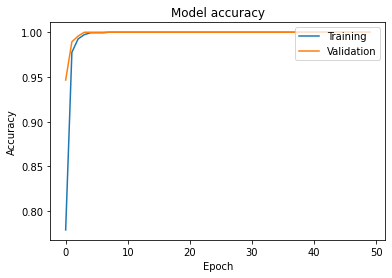

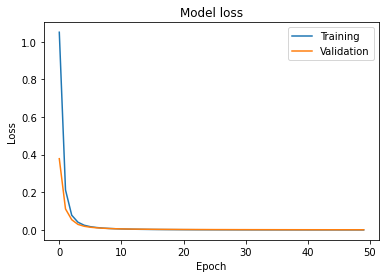

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()


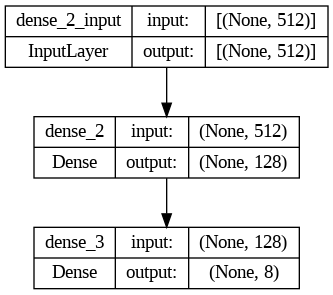

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
#adapt for multiclass

#load test dataset and labels

urls = [
    '/content/drive/MyDrive/facedata/validate/Gowtham',
    '/content/drive/MyDrive/facedata/validate/Narendran',
    '/content/drive/MyDrive/facedata/validate/Pradheep',
    '/content/drive/MyDrive/facedata/validate/Rajesh']

images,labels = make_dataset_labels(urls)

# Generate embeddings for images using FaceNet model
embeddings = facenet_model.embeddings(images)

8/8 [==============================] - 1s 134ms/step


In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(embeddings, labels, verbose=0)

# Print the results
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

InvalidArgumentError: ignored

In [ ]:
# using one image to generate prediction

img_test = tf.keras.preprocessing.image.load_img("/content/drive/MyDrive/IMG_20230119_120324695.jpg", target_size=(224,224))
img_test = tf.keras.preprocessing.image.img_to_array(img_test)
images = [img_test]

embeddings_test = facenet_model.embeddings(images)

model.predict(embeddings_test)

1/1 [==============================] - 0s 41ms/step


array([[1.2773529e-04, 1.5061663e-04, 8.1666891e-04, 3.8273302e-01,
        3.0919549e-05, 9.1114693e-05, 6.1555058e-01, 4.9936277e-04]],
      dtype=float32)

In [ ]:
#sample 2

img_test = tf.keras.preprocessing.image.load_img("/content/drive/MyDrive/faces/Gowtham.png", target_size=(224,224))
img_test = tf.keras.preprocessing.image.img_to_array(img_test)
images = [img_test]

embeddings_test = facenet_model.embeddings(images)

model.predict(embeddings_test)

1/1 [==============================] - 0s 35ms/step


array([[0.93136543, 0.03930245, 0.02347741, 0.00585466]], dtype=float32)

In [ ]:
#sample 3

img_test = tf.keras.preprocessing.image.load_img("/content/drive/MyDrive/faces/Pradheep.png", target_size=(224,224))
img_test = tf.keras.preprocessing.image.img_to_array(img_test)
images = [img_test]

embeddings_test = facenet_model.embeddings(images)

model.predict(embeddings_test)

1/1 [==============================] - 0s 18ms/step


array([[0.02459132, 0.1217575 , 0.8298997 , 0.02375142]], dtype=float32)

In [ ]:
img_test = tf.keras.preprocessing.image.load_img("/content/drive/MyDrive/faces/Rajesh.png", target_size=(224,224))
img_test = tf.keras.preprocessing.image.img_to_array(img_test)
images = [img_test]

embeddings_test = facenet_model.embeddings(images)

model.predict(embeddings_test)

1/1 [==============================] - 0s 17ms/step


array([[0.08717418, 0.87180275, 0.01023625, 0.0307868 ]], dtype=float32)

In [ ]:
img_test = tf.keras.preprocessing.image.load_img("/content/drive/MyDrive/faces/Narendran.png", target_size=(224,224))
img_test = tf.keras.preprocessing.image.img_to_array(img_test)
images = [img_test]

embeddings_test = facenet_model.embeddings(images)

model.predict(embeddings_test)

1/1 [==============================] - 0s 20ms/step


array([[0.04694556, 0.93901557, 0.00492466, 0.00911421]], dtype=float32)